#### 1) Prepare a classification model using SVM for salary data
**Data Description:-**
- age -- age of a person 
- workclass -- A work class is a grouping of work 
- education -- Education of an individuals
- maritalstatus -- Marital status of an individulas
- occupation -- occupation of an individuals relationship --
- race -- Race of an Individual 
- sex -- Gender of an Individual 
- capitalgain -- profit received from the sale of an investment
- capitalloss -- A decrease in the value of a capital asset 
- hoursperweek -- number of hours work per week
- native -- Native of an individual 
- Salary -- salary of an individual

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data = pd.read_csv('SalaryData_Test(1).csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## 3. Data Preparation

In [4]:
train_data.shape

(30161, 14)

In [5]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test_data.shape

(15060, 14)

In [8]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
train_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
test_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060.000000,15060,15060,15060,15060,15060,15060.000000,15060.000000,15060.000000,15060,15060
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,11021,4943,NaN,6990,1992,6203,12970,10147,NaN,NaN,NaN,13788,11360
mean,38.768327,NaN,NaN,10.112749,NaN,NaN,NaN,NaN,NaN,1120.301594,89.041899,40.951594,NaN,NaN
std,13.380676,NaN,NaN,2.558727,NaN,NaN,NaN,NaN,NaN,7703.181842,406.283245,12.062831,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 4. Data Visualization

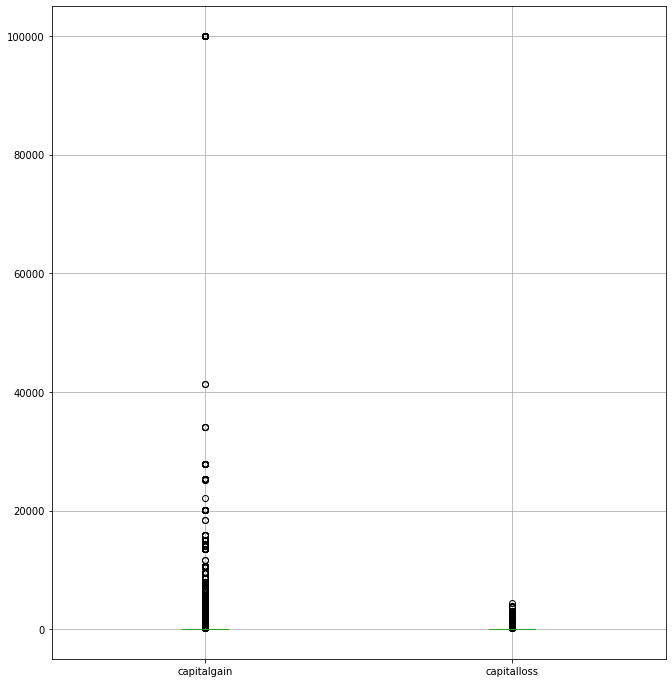

In [12]:
plt.figure(figsize= (11,12))
train_data.boxplot(column=['capitalgain','capitalloss'])
plt.show()

In [13]:
def count_plot(data,columns):
    plt.figure(figsize=(15,10))
    for indx,var in enumerate(columns):
        plt.subplot(5,3,indx+1)
        g = sns.countplot(data[var],hue=data['Salary'])
    plt.tight_layout()
feature = train_data.columns.tolist()
feature.remove('Salary')
feature

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

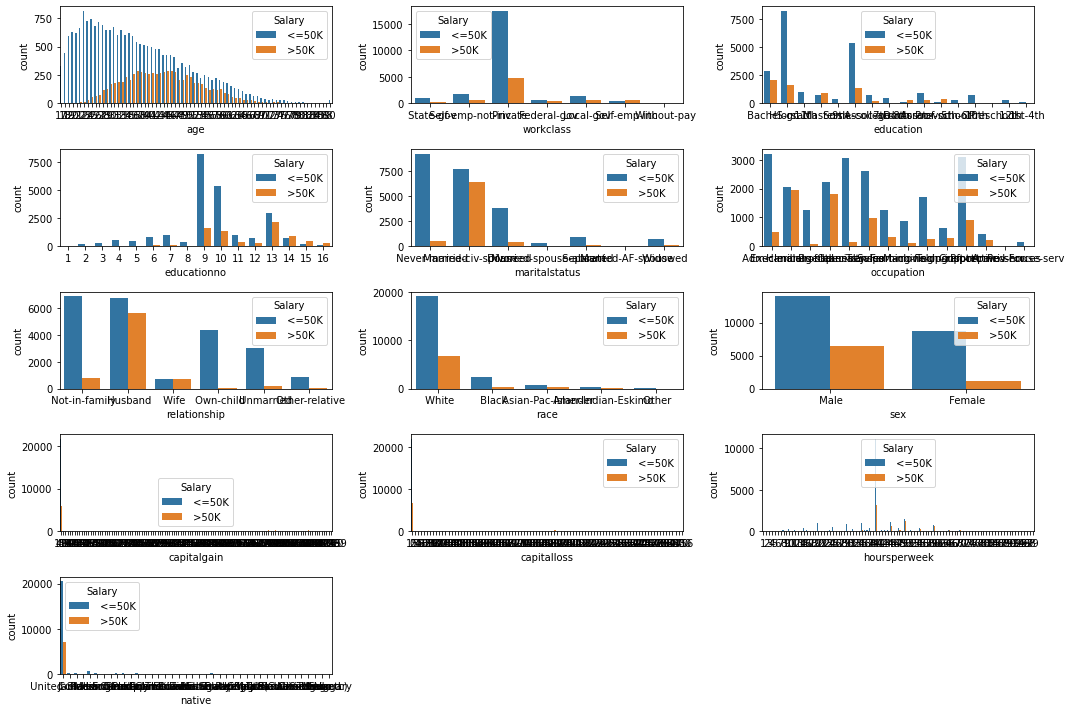

In [14]:
count_plot(train_data,feature)

In [15]:
categorical_data = train_data.select_dtypes(exclude=[np.number])

In [16]:
categorical_data

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [17]:
columns = categorical_data.columns
columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

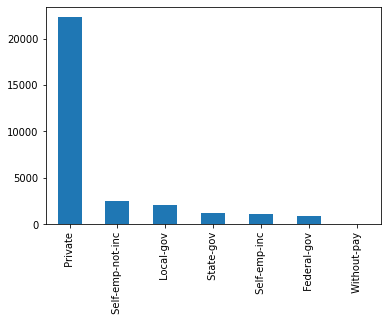

In [18]:
categorical_data['workclass'].value_counts().plot(kind ='bar')
plt.show()

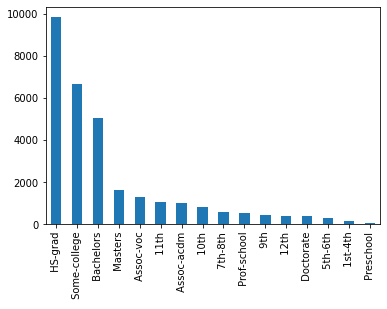

In [19]:
categorical_data['education'].value_counts().plot(kind = 'bar')
plt.show()

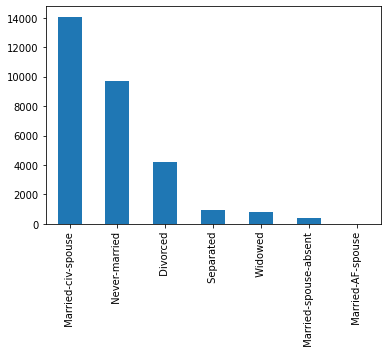

In [20]:
categorical_data['maritalstatus'].value_counts().plot(kind='bar')
plt.show()

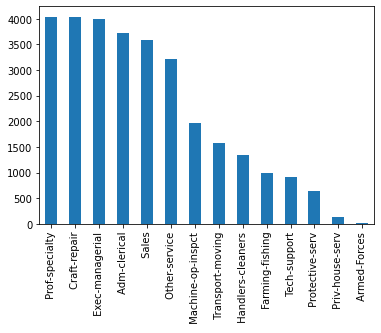

In [21]:
categorical_data['occupation'].value_counts().plot(kind='bar')
plt.show()

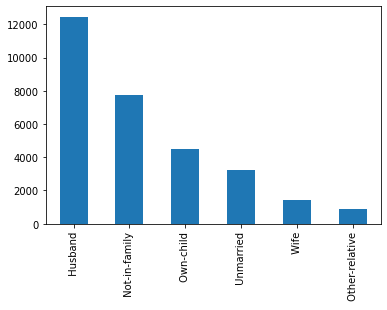

In [22]:
categorical_data['relationship'].value_counts().plot(kind='bar')
plt.show()

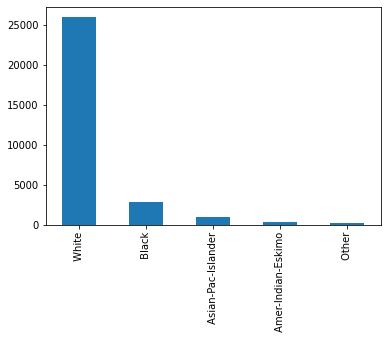

In [23]:
categorical_data['race'].value_counts().plot(kind='bar')
plt.show()

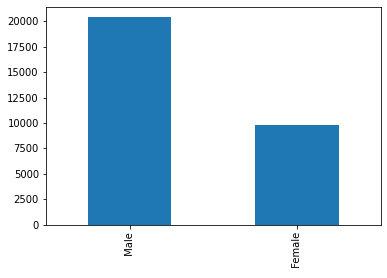

In [24]:
categorical_data['sex'].value_counts().plot(kind = 'bar')
plt.show()

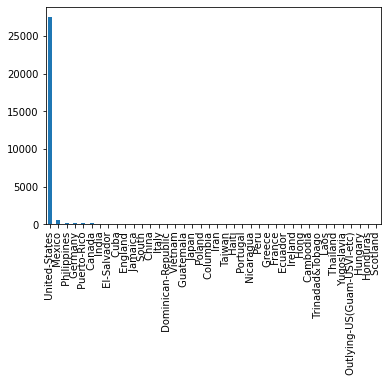

In [25]:
categorical_data['native'].value_counts().plot(kind='bar')
plt.show()

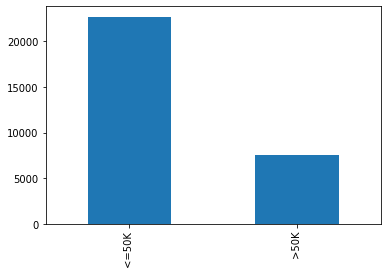

In [26]:
categorical_data['Salary'].value_counts().plot(kind='bar')
plt.show()

In [27]:
categorical_testing = test_data.select_dtypes(exclude=[np.number])

In [28]:
categorical_testing

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [29]:
categorical_testing.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

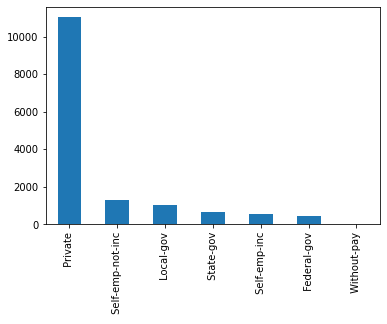

In [30]:
categorical_testing['workclass'].value_counts().plot(kind='bar')
plt.show()

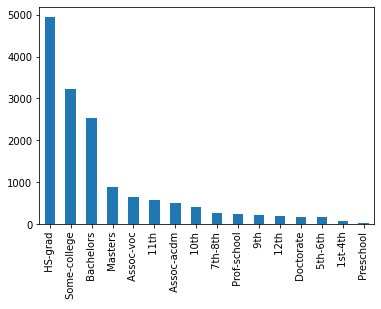

In [31]:
categorical_testing['education'].value_counts().plot(kind='bar')
plt.show()

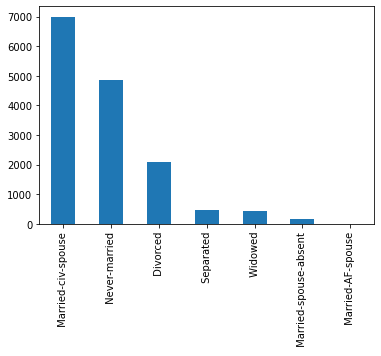

In [32]:
categorical_testing['maritalstatus'].value_counts().plot(kind='bar')
plt.show()

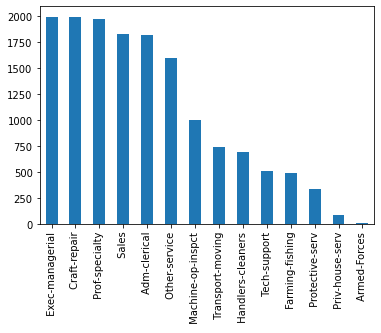

In [33]:
categorical_testing['occupation'].value_counts().plot(kind='bar')
plt.show()

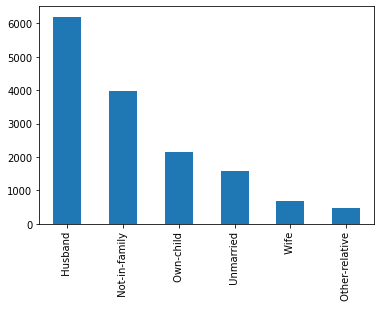

In [34]:
categorical_testing['relationship'].value_counts().plot(kind='bar')
plt.show()

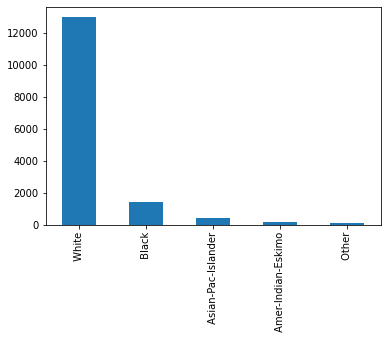

In [35]:
categorical_testing['race'].value_counts().plot(kind='bar')
plt.show()

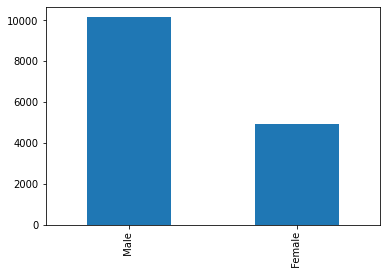

In [36]:
categorical_testing['sex'].value_counts().plot(kind='bar')
plt.show()

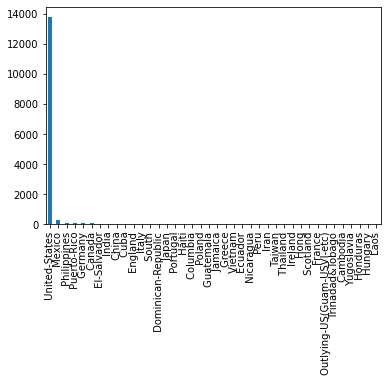

In [37]:
categorical_testing['native'].value_counts().plot(kind='bar')
plt.show()

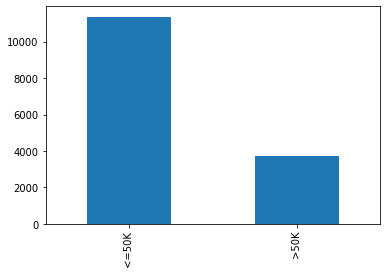

In [38]:
categorical_testing['Salary'].value_counts().plot(kind='bar')
plt.show()

## 5. Data Analysis

In [39]:
salary_data = pd.concat([train_data,test_data])

***Combining test and train data*** 

In [40]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [41]:
salary_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [42]:
salary_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [43]:
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [44]:
df = pd.DataFrame(salary_data,columns=salary_data.columns)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## 6. Model Building

In [45]:
salary_col = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

***Label Encoder***

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
for i in salary_col:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

In [48]:
columns=list(train_data.columns)
X_train = train_data.iloc[0:500,0:13]
y_train = train_data.iloc[0:500,13]
X_test = test_data.iloc[0:300,0:13]
y_test = test_data.iloc[0:300,13]

## 7. Model Training 

**Kernel => 1. Linear**

In [49]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

### Model Testing (Linear kernel)

In [50]:
train_pred_lin = model_linear.predict(X_train)
test_pred_lin = model_linear.predict(X_test)

### Model Evaluation (Linear kernel)

In [51]:
train_lin_acc = np.mean(train_pred_lin==y_train)
print("Accuracy of train data by linear kernel = ", round(train_lin_acc, 2))
test_lin_acc = np.mean(test_pred_lin==y_test)
print("Accuracy of test data by linear kernel = ", round(test_lin_acc, 2))

Accuracy of train data by linear kernel =  0.82
Accuracy of test data by linear kernel =  0.82


***Conclusion :-***
- Accuracy of the Linear kernel type = 82%

**Kernel => 2. Radial Basis Function (RBF)**

In [52]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)

SVC()

### Model Testing (RBF kernel)

In [53]:
train_pred_rbf = model_rbf.predict(X_train)
test_pred_rbf = model_rbf.predict(X_test)

### Model Evaluation (RBF kernel)

In [54]:
train_rbf_acc = np.mean(train_pred_rbf==y_train)
print("Accuracy of train data by RBF kernel = ", round(train_rbf_acc,3))
test_rbf_acc = np.mean(test_pred_rbf==y_test)
print("Accuracy of test data by RBF kernel = ", round(test_rbf_acc,3))

Accuracy of train data by RBF kernel =  0.812
Accuracy of test data by RBF kernel =  0.803


***Conclusion :-***
- Accuracy of the RBF kernel type = 80.3%

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**